<a href="http://cocl.us/pytorch_link_top">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/Pytochtop.png" width="750" alt="IBM Product ">
</a> 


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0321EN-SkillsNetwork/image/IDSN-logo.png" width="200" alt="cognitiveclass.ai logo">


<h1><h1>Pre-trained-Models with PyTorch </h1>


In this lab, you will use pre-trained models to classify between the negative and positive samples; you will be provided with the dataset object. The particular pre-trained model will be resnet18; you will have three questions: 
<ul>
<li>change the output layer</li>
<li> train the model</li> 
<li>  identify  several  misclassified samples</li> 
 </ul>
You will take several screenshots of your work and share your notebook. 


<h2>Table of Contents</h2>


<div class="alert alert-block alert-info" style="margin-top: 20px">


<ul>
    <li><a href="#download_data"> Download Data</a></li>
    <li><a href="#auxiliary"> Imports and Auxiliary Functions </a></li>
    <li><a href="#data_class"> Dataset Class</a></li>
    <li><a href="#Question_1">Question 1</a></li>
    <li><a href="#Question_2">Question 2</a></li>
    <li><a href="#Question_3">Question 3</a></li>
</ul>
<p>Estimated Time Needed: <strong>120 min</strong></p>
 </div>
<hr>


<h2 id="download_data">Download Data</h2>


Download the dataset and unzip the files in your data directory, unlike the other labs, all the data will be deleted after you close  the lab, this may take some time:


In [ ]:
#!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Positive_tensors.zip 

In [ ]:
#!unzip -q Positive_tensors.zip 

In [ ]:
#! wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Negative_tensors.zip
#!unzip -q Negative_tensors.zip

In [3]:
import gc
gc.collect()

90

In [4]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           31Gi       3.1Gi       8.8Gi       5.0Mi        19Gi        27Gi
Swap:            0B          0B          0B


We will install torchvision:


In [5]:
!pip install torchvision

<h2 id="auxiliary">Imports and Auxiliary Functions</h2>


The following are the libraries we are going to use for this lab. The <code>torch.manual_seed()</code> is for forcing the random function to give the same number every time we try to recompile it.


In [6]:
# These are the libraries will be used for this lab.
import torchvision.models as models
from PIL import Image
import pandas
from torchvision import transforms
import torch.nn as nn
import time
import torch 
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
import h5py
import os
import glob
import pickle
torch.manual_seed(0)

In [7]:
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image
import pandas as pd
import os

<!--Empty Space for separating topics-->


<h2 id="data_class">Dataset Class</h2>


 This dataset class is essentially the same dataset you build in the previous section, but to speed things up, we are going to use tensors instead of jpeg images. Therefor for each iteration, you will skip the reshape step, conversion step to tensors and normalization step.


In [8]:
# Create your own dataset object

class Dataset(Dataset):

    # Constructor
    def __init__(self,transform=None,train=True):
        #directory="/home/wsuser/work"
        directory="."
        positive="Positive_tensors"
        negative='Negative_tensors'

        positive_file_path=os.path.join(directory,positive)
        negative_file_path=os.path.join(directory,negative)
        positive_files=[os.path.join(positive_file_path,file) for file in os.listdir(positive_file_path) if file.endswith(".pt")]
        negative_files=[os.path.join(negative_file_path,file) for file in os.listdir(negative_file_path) if file.endswith(".pt")]
        number_of_samples=len(positive_files)+len(negative_files)
        self.all_files=[None]*number_of_samples
        self.all_files[::2]=positive_files
        self.all_files[1::2]=negative_files 
        # The transform is goint to be used on image
        self.transform = transform
        #torch.LongTensor
        self.Y=torch.zeros([number_of_samples]).type(torch.LongTensor)
        self.Y[::2]=1
        self.Y[1::2]=0
        
        if train:
            self.all_files=self.all_files[0:30000]
            #self.all_files=self.all_files[0:3000]
            self.Y=self.Y[0:30000]
            #self.Y=self.Y[0:3000]
            self.len=len(self.all_files)
        else:
            self.all_files=self.all_files[30000:]
            #self.all_files=self.all_files[3000:6000]
            self.Y=self.Y[30000:]
            #self.Y=self.Y[3000:6000]
            self.len=len(self.all_files)     
       
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
               
        image=torch.load(self.all_files[idx])
        y=self.Y[idx]
                  
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y
    
print("done")

done


We create two dataset objects, one for the training data and one for the validation data.


In [9]:
train_dataset = Dataset(train=True)
validation_dataset = Dataset(train=False)
print("done")

done


<h2 id="Question_1">Question 1</h2>


<b>Prepare a pre-trained resnet18 model :</b>


<b>Step 1</b>: Load the pre-trained model <code>resnet18</code> Set the parameter <code>pretrained</code> to true:


In [10]:
# Step 1: Load the pre-trained model resnet18

# Load the ResNet18 model with pre-trained weights
model = models.resnet18(pretrained=True)

# Set the model to evaluation mode
#model.eval()

# Print the model architecture
print(model)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/jupyterlab/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

<b>Step 2</b>: Set the attribute <code>requires_grad</code> to <code>False</code>. As a result, the parameters will not be affected by training.


In [11]:
# Step 2: Set the parameter cannot be trained for the pre-trained model


# Freeze all parameters in the model
for param in model.parameters():
    param.requires_grad = False  # This prevents updates during training

# Print model summary to confirm parameters are frozen
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

<code>resnet18</code> is used to classify 1000 different objects; as a result, the last layer has 1000 outputs.  The 512 inputs come from the fact that the previously hidden layer has 512 outputs. 


<b>Step 3</b>: Replace the output layer <code>model.fc</code> of the neural network with a <code>nn.Linear</code> object, to classify 2 different classes. For the parameters <code>in_features </code> remember the last hidden layer has 512 neurons.


In [12]:
# Replace the last fully connected layer (fc) for 2-class classification
num_ftrs = model.fc.in_features  # Get the number of input features (512)
model.fc = nn.Linear(in_features=num_ftrs, out_features=2)  # Modify for binary classification

# Print the modified model
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Print out the model in order to show whether you get the correct answer.<br> <b>(Your peer reviewer is going to mark based on what you print here.)</b>


In [13]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

<h2 id="Question_2">Question 2: Train the Model</h2>


In this question you will train your, model:


<b>Step 1</b>: Create a cross entropy criterion function 


In [14]:
# Step 1: Create the loss function

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Print the criterion to confirm
print(criterion)

CrossEntropyLoss()


<b>Step 2</b>: Create a training loader and validation loader object, the batch size should have 100 samples each.


In [15]:
# Define batch size
batch_size = 100  

# Create DataLoader for training dataset
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Create DataLoader for validation dataset
val_loader = DataLoader(dataset=validation_dataset, batch_size=batch_size, shuffle=False)

# Print confirmation
print(f"Training batches: {len(train_loader)}, Validation batches: {len(val_loader)}")

Training batches: 300, Validation batches: 100


<b>Step 3</b>: Use the following optimizer to minimize the loss 


In [16]:
optimizer = torch.optim.Adam([parameters  for parameters in model.parameters() if parameters.requires_grad],lr=0.001)

<!--Empty Space for separating topics-->


**Complete the following code to calculate  the accuracy on the validation data for one epoch; this should take about 45 minutes. Make sure you calculate the accuracy on the validation data.**


In [17]:
# Number of epochs
n_epochs = 1  

# File paths for saving progress
checkpoint_path = "training_checkpoint.pth"
results_path = "training_results.pkl"

# Load previous results if available
if os.path.exists(results_path):
    with open(results_path, "rb") as f:
        saved_data = pickle.load(f)
        loss_list = saved_data["loss_list"]
        accuracy_list = saved_data["accuracy_list"]
        start_epoch = saved_data["epoch"] + 1
else:
    loss_list = []
    accuracy_list = []
    start_epoch = 0  # Start fresh

# Track dataset sizes
N_test = len(validation_dataset)  
N_train = len(train_dataset)  

print(f"N_test: {N_test}, N_train: {N_train}")

# Load model checkpoint if available
if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint["model_state"])
    optimizer.load_state_dict(checkpoint["optimizer_state"])
    print(f"Resuming training from epoch {start_epoch}")

# Start training
start_time = time.time()

for epoch in range(start_epoch, n_epochs):
    print(f"\n🔹 Epoch {epoch+1}/{n_epochs} Started...")

    running_loss = 0.0  
    model.train()  # Set model to training mode

    # Training Loop
    for batch_idx, (x, y) in enumerate(train_loader):
        print(f"📌 Training Batch {batch_idx+1}/{len(train_loader)}")

        optimizer.zero_grad()  # Clear gradient
        y_pred = model(x)  # Forward pass
        loss = criterion(y_pred, y)  # Calculate loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update parameters

        running_loss += loss.item()

    # Store average loss for the epoch
    avg_loss = running_loss / len(train_loader)
    loss_list.append(avg_loss)

    print(f"✅ Training Done for Epoch {epoch+1}, Avg Loss: {avg_loss:.4f}")

    # Validation Loop
    correct = 0  
    model.eval()  # Set model to evaluation mode

    print("🔍 Starting Validation...")
    with torch.no_grad():
        for batch_idx, (x_test, y_test) in enumerate(val_loader):
            print(f"📌 Validating Batch {batch_idx+1}/{len(val_loader)}")

            yhat = model(x_test)  # Prediction
            _, predicted = torch.max(yhat, 1)  # Get predicted class
            correct += (predicted == y_test).sum().item()

    # Calculate accuracy
    accuracy = correct / N_test
    accuracy_list.append(accuracy)

    print(f"🏆 Epoch {epoch+1} Completed — Validation Accuracy: {accuracy:.4f}")

    # Save intermediate results
    checkpoint = {
        "epoch": epoch,
        "model_state": model.state_dict(),
        "optimizer_state": optimizer.state_dict(),
    }
    torch.save(checkpoint, checkpoint_path)

    with open(results_path, "wb") as f:
        pickle.dump({"epoch": epoch, "loss_list": loss_list, "accuracy_list": accuracy_list}, f)

# Print total training time
end_time = time.time()
print(f"\n🚀 Training completed in: {end_time - start_time:.2f} seconds")
print(f"🔥 Best Validation Accuracy: {max(accuracy_list):.4f}")

N_test: 10000, N_train: 30000

🔹 Epoch 1/1 Started...
📌 Training Batch 1/300
📌 Training Batch 2/300
📌 Training Batch 3/300
📌 Training Batch 4/300
📌 Training Batch 5/300
📌 Training Batch 6/300
📌 Training Batch 7/300
📌 Training Batch 8/300
📌 Training Batch 9/300
📌 Training Batch 10/300
📌 Training Batch 11/300
📌 Training Batch 12/300
📌 Training Batch 13/300
📌 Training Batch 14/300
📌 Training Batch 15/300
📌 Training Batch 16/300
📌 Training Batch 17/300
📌 Training Batch 18/300
📌 Training Batch 19/300
📌 Training Batch 20/300
📌 Training Batch 21/300
📌 Training Batch 22/300
📌 Training Batch 23/300
📌 Training Batch 24/300
📌 Training Batch 25/300
📌 Training Batch 26/300
📌 Training Batch 27/300
📌 Training Batch 28/300
📌 Training Batch 29/300
📌 Training Batch 30/300
📌 Training Batch 31/300
📌 Training Batch 32/300
📌 Training Batch 33/300
📌 Training Batch 34/300
📌 Training Batch 35/300
📌 Training Batch 36/300
📌 Training Batch 37/300
📌 Training Batch 38/300
📌 Training Batch 39/300
📌 Training Batch 40

<b>Print out the Accuracy and plot the loss stored in the list <code>loss_list</code> for every iteration and take a screen shot.</b>


In [18]:
import matplotlib.pyplot as plt

# Print Final Accuracy for Each Epoch
print("\n🏆 Accuracy per Epoch:")
for epoch, acc in enumerate(accuracy_list, 1):
    print(f"Epoch {epoch}: Accuracy = {acc:.4f}")



🏆 Accuracy per Epoch:
Epoch 1: Accuracy = 0.9944


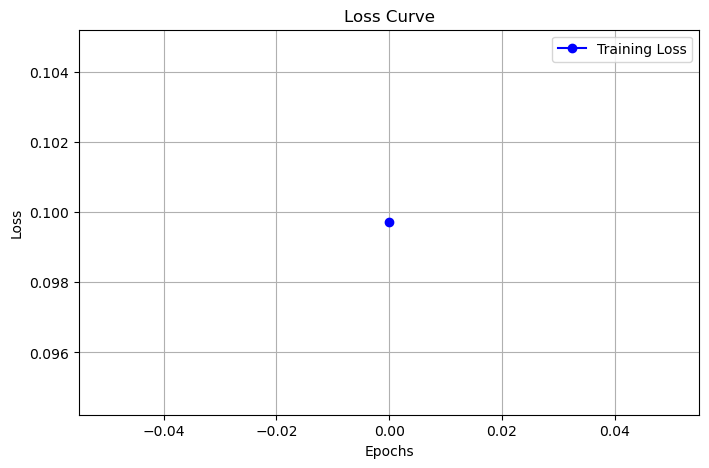

In [19]:
# Plot Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(loss_list, marker='o', linestyle='-', color='b', label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.grid(True)
plt.show()

<h2 id="Question_3">Question 3:Find the misclassified samples</h2> 


<b>Identify the first four misclassified samples using the validation data:</b>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


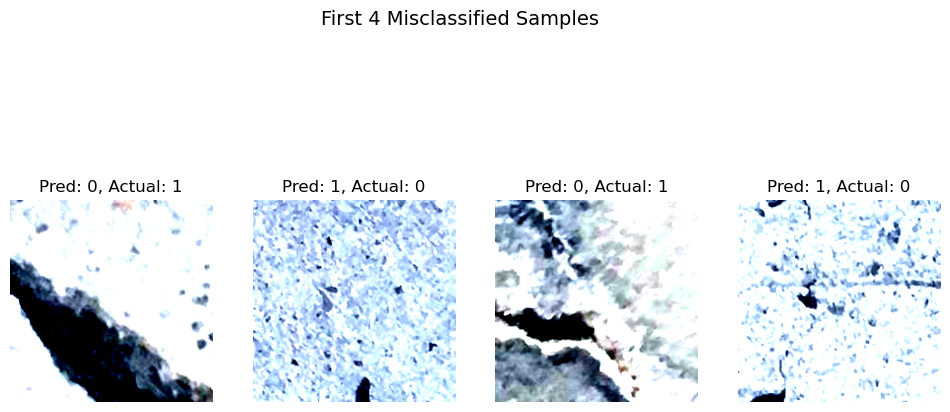

In [20]:
import matplotlib.pyplot as plt

# Set model to evaluation mode
model.eval()

# List to store misclassified samples
misclassified_samples = []

# Loop through validation data
with torch.no_grad():  # No need for gradients during evaluation
    for x_test, y_test in val_loader:
        yhat = model(x_test)  # Forward pass (prediction)
        _, predicted = torch.max(yhat, 1)  # Get predicted class

        # Find misclassified samples
        for i in range(len(y_test)):
            if predicted[i] != y_test[i]:  # Check misclassification
                misclassified_samples.append((x_test[i], predicted[i].item(), y_test[i].item()))

            # Stop when we collect 4 misclassified samples
            if len(misclassified_samples) >= 4:
                break
        if len(misclassified_samples) >= 4:
            break

# Plot the first 4 misclassified samples
fig, axes = plt.subplots(1, 4, figsize=(12, 6))

for i, (image, pred, actual) in enumerate(misclassified_samples):
    image = image.permute(1, 2, 0)  # Convert to (H, W, C) format
    axes[i].imshow(image.numpy(), cmap="gray")
    axes[i].set_title(f"Pred: {pred}, Actual: {actual}", fontsize=12)
    axes[i].axis("off")

plt.suptitle("First 4 Misclassified Samples", fontsize=14)
plt.show()

<a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/share-notebooks.html?utm_source=Exinfluencer&utm_content=000026UJ&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0321ENSkillsNetwork951-2022-01-01&utm_medium=Exinfluencer&utm_term=10006555"> CLICK HERE </a> Click here to see how to share your notebook.


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0321ENSkillsNetwork951-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.



## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-09-21  | 2.0  | Shubham  |  Migrated Lab to Markdown and added to course repo in GitLab |



<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>


Copyright &copy; 2018 <a href="cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu">cognitiveclass.ai</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0321ENSkillsNetwork951-2022-01-01">MIT License</a>.
